In [137]:
from __future__ import print_function, division

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
%matplotlib inline

In [139]:
df = pd.read_csv('dummy_data.csv')

In [140]:
df.head()

,Unnamed: 0,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
0,0,6,995.0,4.0,180,281,378,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6,2900.0,4.0,180,281,378,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,500.0,4.0,180,281,378,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,6,900.0,4.0,180,281,378,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6,2000.0,4.0,180,281,378,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
#I need to drop the Unnamed: 0 column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [142]:
print(df.dtypes)

MaxOcc                           int64
Price                          float64
Rating                         float64
Reviews                         object
PriceMin                         int64
PriceMax                         int64
Bdrs                           float64
Baths                          float64
Hanalei, Kauai  Hawaii           int64
Honolulu, Oahu  Hawaii           int64
Kahana, Maui  Hawaii             int64
Kailua-Kona, Hawaii  Hawaii      int64
Kaluakoi, Molokai  Hawaii        int64
Kapaa, Kauai  Hawaii             int64
Kapolei, Oahu  Hawaii            int64
Kauai  Hawaii                    int64
Kaupalua, Maui  Hawaii           int64
Kihei, Maui  Hawaii              int64
Ko Olina, Oahu  Hawaii           int64
Koloa, Kauai  Hawaii             int64
Lahaina, Maui  Hawaii            int64
Lihue, Kauai  Hawaii             int64
Makaha, Oahu  Hawaii             int64
Maui  Hawaii                     int64
Princeville, Kauai  Hawaii       int64
Waikoloa  Hawaii         

In [143]:
df.Reviews.unique()

array(['180', '5472', '282', '309', '813', '83', '1,848', '240', '1,482',
       '1,360', '2,136', '777', '101', '379', '642', '1,481', '333', '483',
       '153', '74', '322', '1,129', '81', '1,610', '325', '249', '783',
       '3,204', '1,966', '1,081', '189', '144', '245', '428', '254', '147',
       '63', '771', '137', '842', '1,118', '257', '730', '532', '756',
       '541', '106', '304', '835', '531', '2,020', '4,522', '696', '781',
       '511'], dtype=object)

I see that the Reviews column's datatype is object. I want to convert this to float.

In [144]:
#I created a new list of the items in Reviews and removed the commas from each number and then converted the numbers to floats.

floats = []
for item in df['Reviews']:
    if ',' in item:
        item = [x.strip() for x in item.split(',')]
        item = ''.join(item)
        item = float(item)
        floats.append(item)
        
    else:
        item = float(item)
        floats.append(item)

In [145]:
floats

[180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 5472.0,
 282.0,
 282.0,
 282.0,
 282.0,
 282.0,
 282.0,
 282.0,
 282.0,
 282.0,
 309.0,
 309.0,
 309.0,
 309.0,
 813.0,
 813.0,
 813.0,
 813.0,
 83.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 1848.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482.0,
 1482

In [146]:
#Change the Reviews column to include the items from the floats list
df['Reviews'] = floats

In [147]:
#Check to see if the datatype of the Reviews column has changed to float
print(df.dtypes)

MaxOcc                           int64
Price                          float64
Rating                         float64
Reviews                        float64
PriceMin                         int64
PriceMax                         int64
Bdrs                           float64
Baths                          float64
Hanalei, Kauai  Hawaii           int64
Honolulu, Oahu  Hawaii           int64
Kahana, Maui  Hawaii             int64
Kailua-Kona, Hawaii  Hawaii      int64
Kaluakoi, Molokai  Hawaii        int64
Kapaa, Kauai  Hawaii             int64
Kapolei, Oahu  Hawaii            int64
Kauai  Hawaii                    int64
Kaupalua, Maui  Hawaii           int64
Kihei, Maui  Hawaii              int64
Ko Olina, Oahu  Hawaii           int64
Koloa, Kauai  Hawaii             int64
Lahaina, Maui  Hawaii            int64
Lihue, Kauai  Hawaii             int64
Makaha, Oahu  Hawaii             int64
Maui  Hawaii                     int64
Princeville, Kauai  Hawaii       int64
Waikoloa  Hawaii         

In [148]:
#Remove outliers in Price
df = df.loc[df['Price']<=100000,:]
df.shape

(4443, 27)

In [149]:
#Observe correlations between variables
df.corr()

,MaxOcc,Price,Rating,Reviews,PriceMin,PriceMax,Bdrs,Baths,"Hanalei, Kauai Hawaii","Honolulu, Oahu Hawaii",...,"Kihei, Maui Hawaii","Ko Olina, Oahu Hawaii","Koloa, Kauai Hawaii","Lahaina, Maui Hawaii","Lihue, Kauai Hawaii","Makaha, Oahu Hawaii",Maui Hawaii,"Princeville, Kauai Hawaii",Waikoloa Hawaii,"Waikoloa, Hawaii Hawaii"
MaxOcc,1.000000,0.426315,0.435484,0.398204,0.424108,0.403642,0.784568,0.591123,-0.062353,-0.153010,...,-0.058501,0.012089,0.021051,0.242653,-0.197879,-0.049228,-0.236343,0.017599,-0.044524,-0.008240
Price,0.426315,1.000000,0.327140,0.258123,0.458462,0.431698,0.501929,0.430451,-0.052975,0.029415,...,-0.075646,0.004482,-0.088994,0.381550,-0.115695,-0.036197,-0.142561,-0.119906,-0.081574,-0.025452
Rating,0.435484,0.327140,1.000000,0.622431,0.717640,0.664209,0.262884,0.287670,-0.115973,-0.411785,...,-0.180311,0.009881,-0.099448,0.510502,-0.276375,-0.048694,-0.345944,-0.008944,0.074941,-0.029802
Reviews,0.398204,0.258123,0.622431,1.000000,0.717024,0.667998,0.166058,0.016716,-0.026963,-0.177948,...,-0.138861,0.033721,-0.277205,0.571195,-0.249432,-0.058697,-0.159890,-0.159496,-0.125332,-0.025069
PriceMin,0.424108,0.458462,0.717640,0.717024,1.000000,0.913883,0.218911,0.278333,-0.018887,-0.191610,...,-0.134227,0.015051,-0.131180,0.763754,-0.250864,-0.035675,-0.203239,-0.196833,-0.226463,-0.058221
PriceMax,0.403642,0.431698,0.664209,0.667998,0.913883,1.000000,0.234581,0.242426,-0.144758,-0.086861,...,-0.164130,0.015486,0.103235,0.691171,-0.213288,-0.094416,-0.218255,-0.171245,-0.206915,-0.049763
Bdrs,0.784568,0.501929,0.262884,0.166058,0.218911,0.234581,1.000000,0.682993,-0.043366,-0.067139,...,-0.022474,0.005989,0.136461,0.111869,-0.209846,-0.045505,-0.249148,0.041214,0.060377,0.010376
Baths,0.591123,0.430451,0.287670,0.016716,0.278333,0.242426,0.682993,1.000000,-0.036091,-0.106422,...,-0.055400,0.000844,0.034699,0.266132,-0.028268,-0.063396,-0.336165,-0.024856,-0.006492,0.010409
"Hanalei, Kauai Hawaii",-0.062353,-0.052975,-0.115973,-0.026963,-0.018887,-0.144758,-0.043366,-0.036091,1.000000,-0.026333,...,-0.010116,-0.001518,-0.031422,-0.092568,-0.024384,-0.004296,-0.025167,-0.020299,-0.021380,-0.002629
"Honolulu, Oahu Hawaii",-0.153010,0.029415,-0.411785,-0.177948,-0.191610,-0.086861,-0.067139,-0.106422,-0.026333,1.000000,...,-0.026036,-0.003906,-0.080868,-0.238237,-0.062755,-0.011057,-0.064771,-0.052243,-0.055024,-0.006767


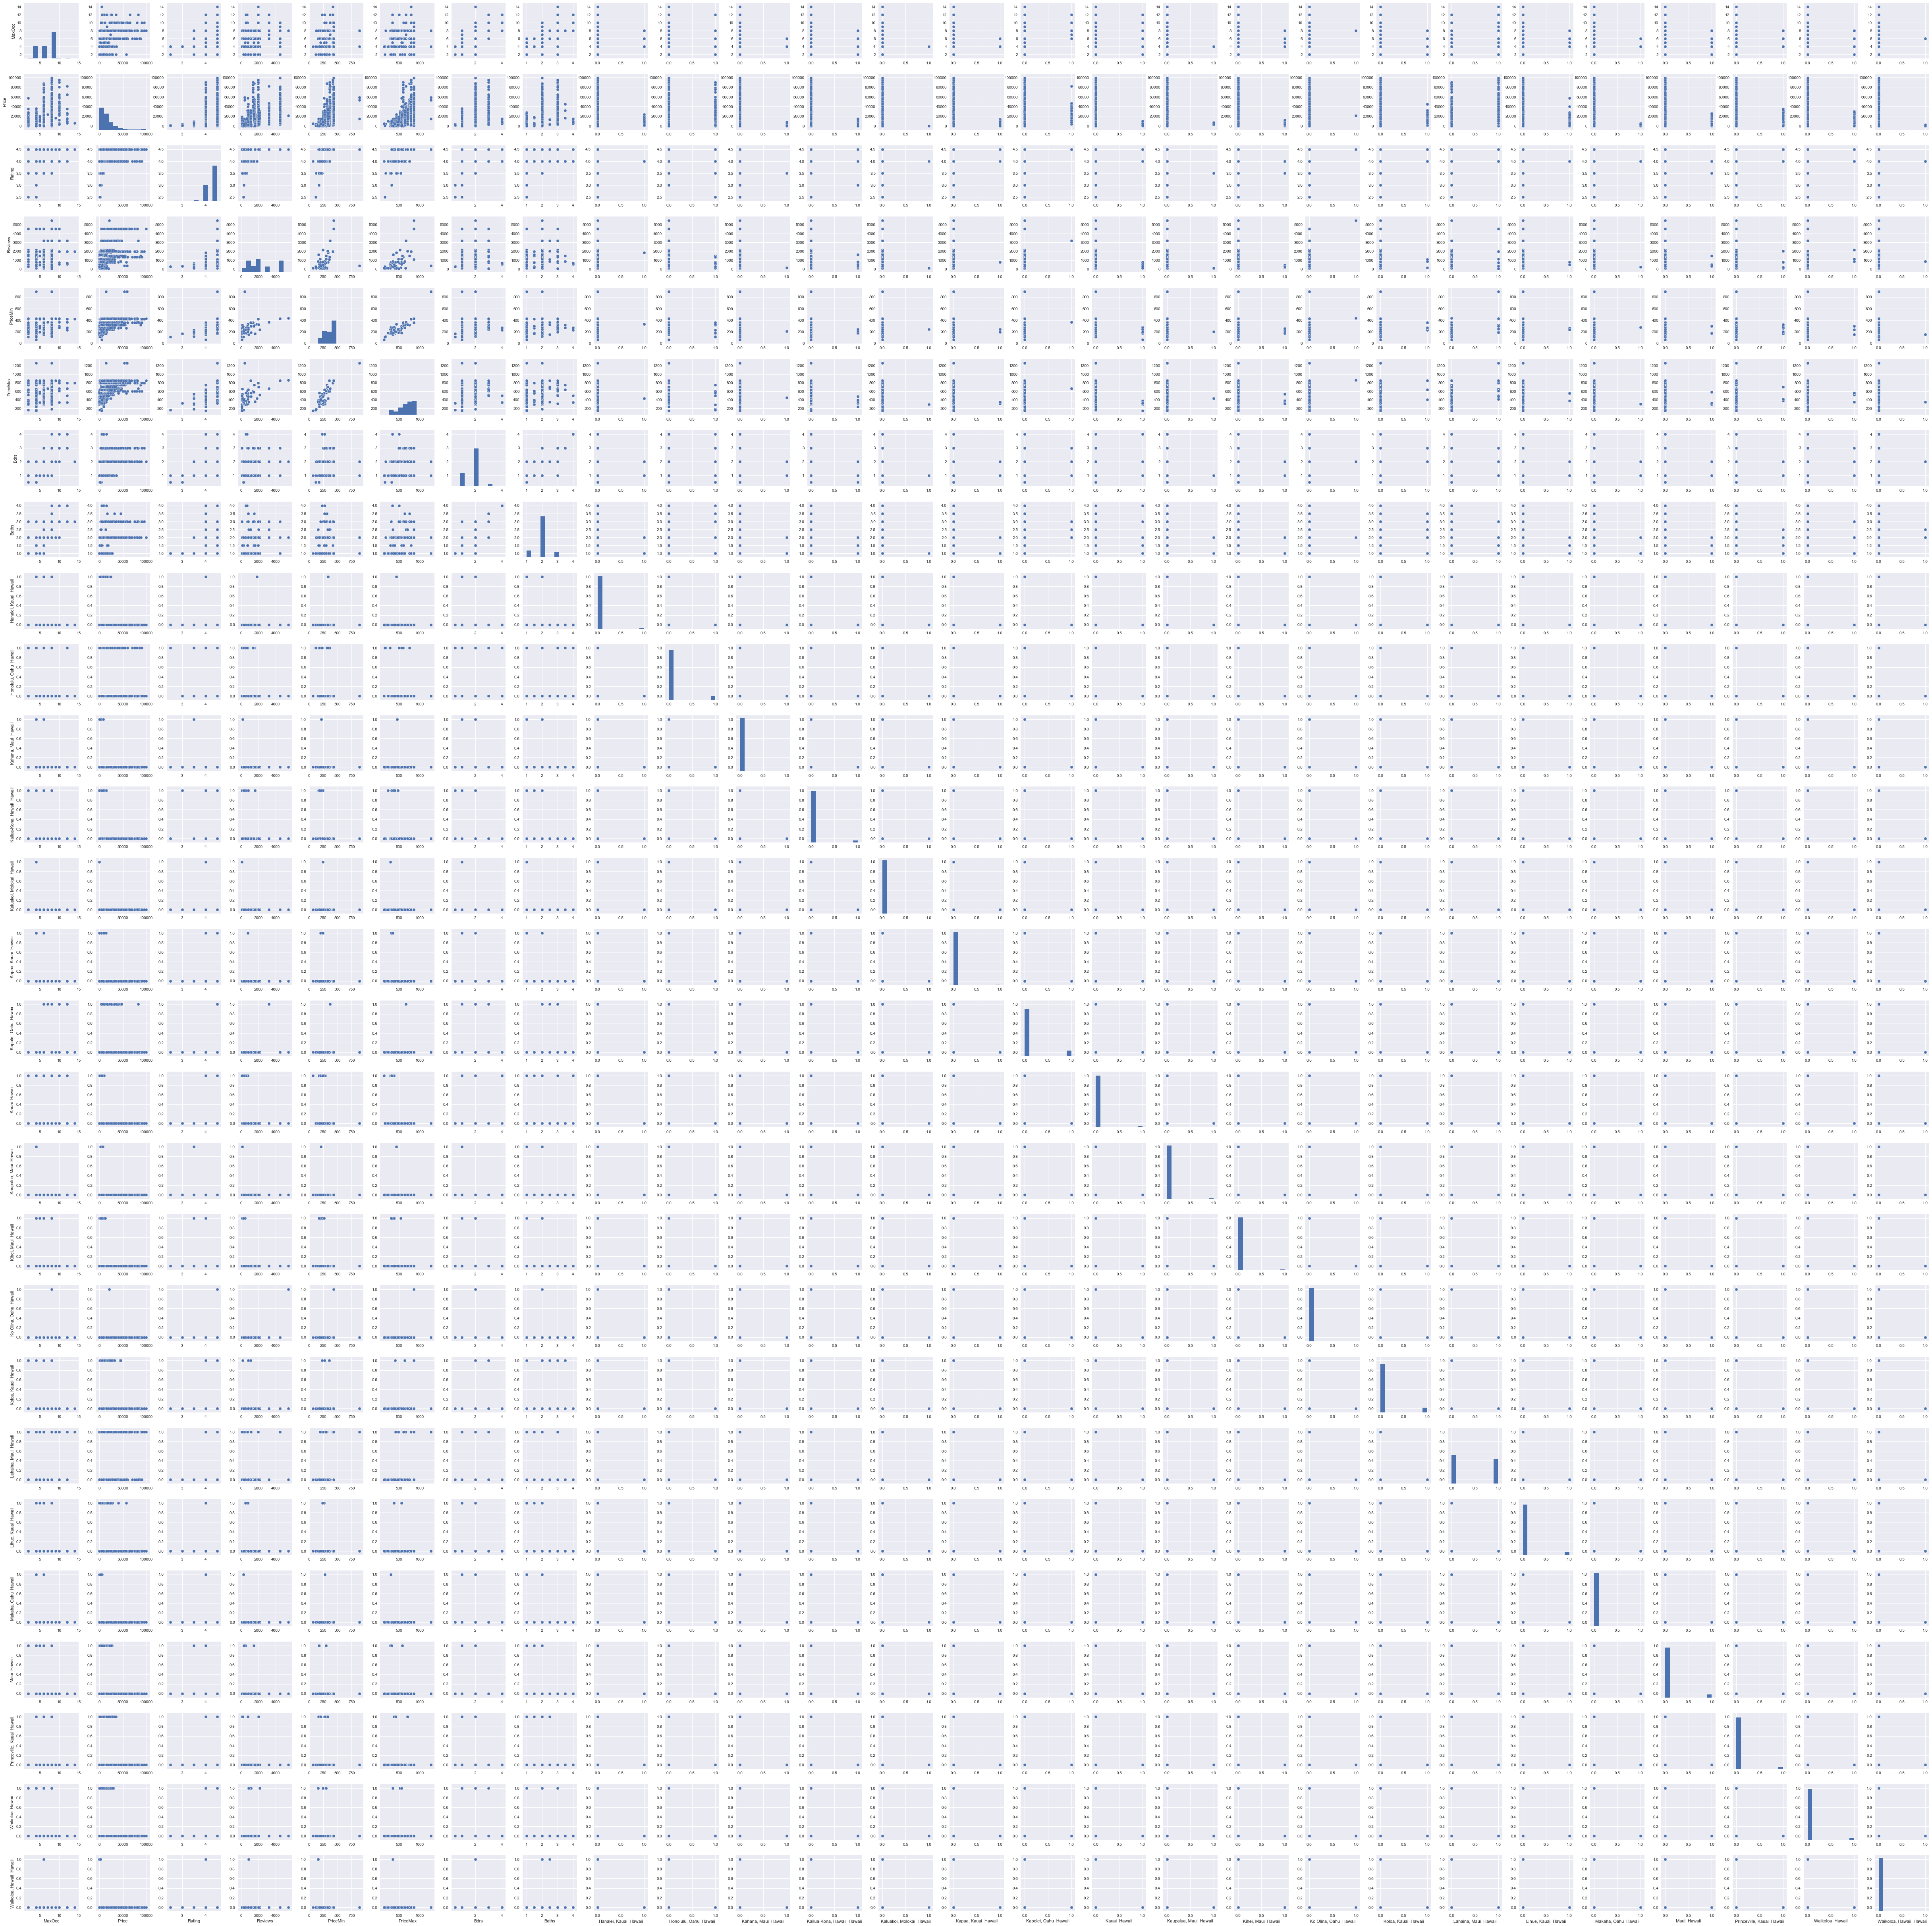

In [150]:
sns.pairplot(df)

In [151]:
df1 = df.copy(deep=True)

In [152]:
#Create a dataframe without the dummy variables
df1 = df1[['MaxOcc', 'Price', 'Reviews', 'Rating', 'PriceMin', 'PriceMax', 'Bdrs', 'Baths']]

In [153]:
print(df1.dtypes)

MaxOcc        int64
Price       float64
Reviews     float64
Rating      float64
PriceMin      int64
PriceMax      int64
Bdrs        float64
Baths       float64
dtype: object


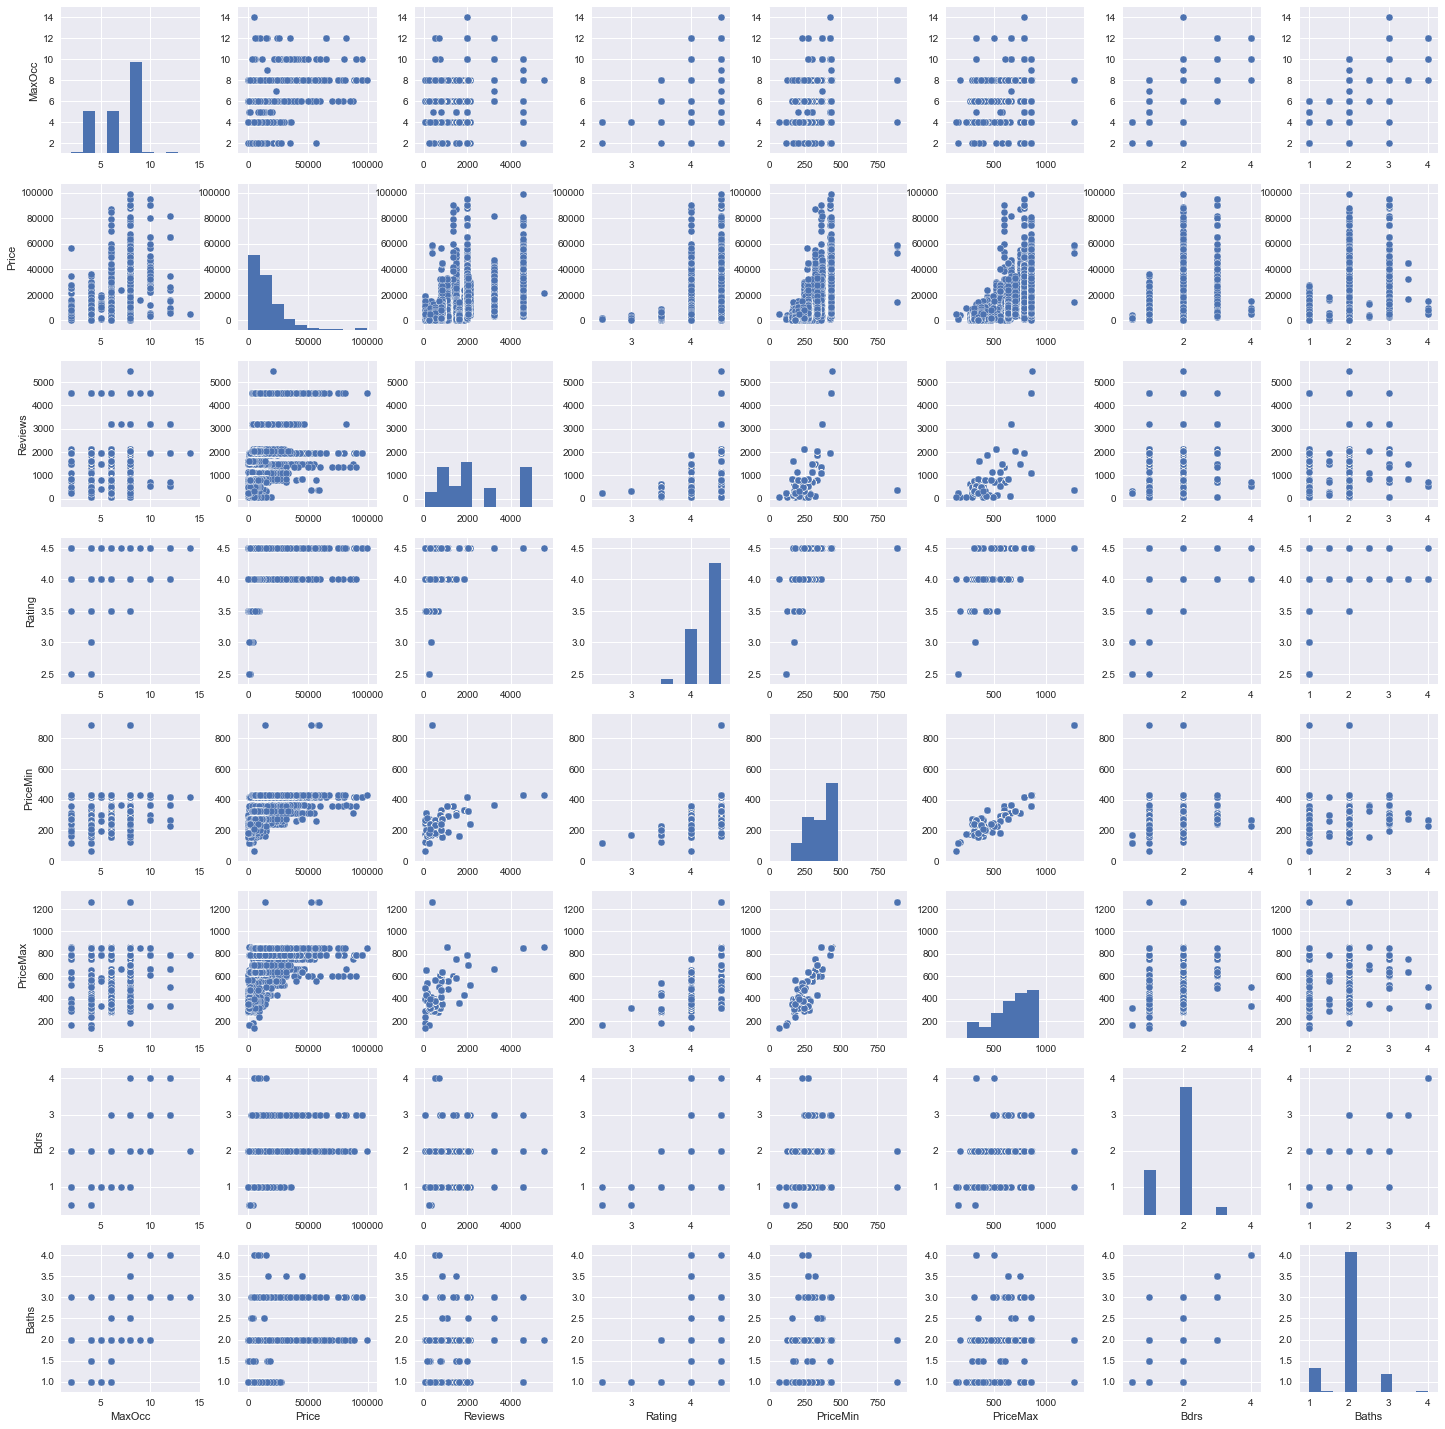

In [154]:
sns.pairplot(df1)

In [155]:
df1.corr()

,MaxOcc,Price,Reviews,Rating,PriceMin,PriceMax,Bdrs,Baths
MaxOcc,1.000000,0.426315,0.398204,0.435484,0.424108,0.403642,0.784568,0.591123
Price,0.426315,1.000000,0.258123,0.327140,0.458462,0.431698,0.501929,0.430451
Reviews,0.398204,0.258123,1.000000,0.622431,0.717024,0.667998,0.166058,0.016716
Rating,0.435484,0.327140,0.622431,1.000000,0.717640,0.664209,0.262884,0.287670
PriceMin,0.424108,0.458462,0.717024,0.717640,1.000000,0.913883,0.218911,0.278333
PriceMax,0.403642,0.431698,0.667998,0.664209,0.913883,1.000000,0.234581,0.242426
Bdrs,0.784568,0.501929,0.166058,0.262884,0.218911,0.234581,1.000000,0.682993
Baths,0.591123,0.430451,0.016716,0.287670,0.278333,0.242426,0.682993,1.000000


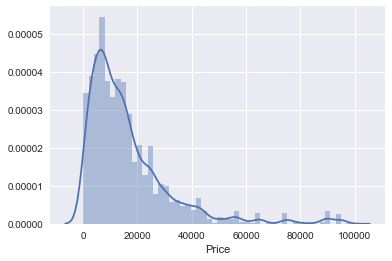

In [156]:
#Find distribution of Price
sns.distplot(df['Price'])

In [157]:
list(df.columns.values)

['MaxOcc',
 'Price',
 'Rating',
 'Reviews',
 'PriceMin',
 'PriceMax',
 'Bdrs',
 'Baths',
 'Hanalei, Kauai  Hawaii',
 'Honolulu, Oahu  Hawaii',
 'Kahana, Maui  Hawaii',
 'Kailua-Kona, Hawaii  Hawaii',
 'Kaluakoi, Molokai  Hawaii',
 'Kapaa, Kauai  Hawaii',
 'Kapolei, Oahu  Hawaii',
 'Kauai  Hawaii',
 'Kaupalua, Maui  Hawaii',
 'Kihei, Maui  Hawaii',
 'Ko Olina, Oahu  Hawaii',
 'Koloa, Kauai  Hawaii',
 'Lahaina, Maui  Hawaii',
 'Lihue, Kauai  Hawaii',
 'Makaha, Oahu  Hawaii',
 'Maui  Hawaii',
 'Princeville, Kauai  Hawaii',
 'Waikoloa  Hawaii',
 'Waikoloa, Hawaii  Hawaii']

<h1>1. Baselining</h1>

Looking at the correlation  tables, the Price and Bedrooms columns had the highest correlation. Price is my target variable.

In [158]:
#Select the Bdrs column
X=df['Bdrs']

y=df['Price']


model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1496.
Date:                Tue, 06 Feb 2018   Prob (F-statistic):          2.90e-282
Time:                        17:21:50   Log-Likelihood:                -48608.
No. Observations:                4443   AIC:                         9.722e+04
Df Residuals:                    4441   BIC:                         9.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.162e+04    749.980    -15.488      0.000   -1.31e+04   -1.01e+04
Bdrs        1.553e+04    401.615     38.673      0.000    1.47e+04    1.63e+04
==============================================================================
Omnibus:                     1373.836   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5087.467
Skew:                           1.510   Prob(JB):                         0.00
Kurtosis:                       7.285   Cond. No.                         8.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>2. Expand Model</h1>

I will look at summary statistics for the the four variables most correlated with price.

In [159]:
#Select the Bdrs column
X2=df.loc[:,['Bdrs', 'MaxOcc', 'PriceMin', 'Baths']]

y2=df['Price']


model = sm.OLS(y2,sm.add_constant(X2))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     723.4
Date:                Tue, 06 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:21:50   Log-Likelihood:                -48138.
No. Observations:                4443   AIC:                         9.629e+04
Df Residuals:                    4438   BIC:                         9.632e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.206e+04    968.158    -33.111      0.000    -3.4e+04   -3.02e+04
Bdrs        1.567e+04    668.699     23.439      0.000    1.44e+04     1.7e+04
MaxOcc     -1721.3749    183.856     -9.363      0.000   -2081.824   -1360.926
PriceMin      74.7326      2.450     30.504      0.000      69.930      79.536
Baths       2815.1695    530.564      5.306      0.000    1775.000    3855.339
==============================================================================
Omnibus:                     1471.977   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5884.613
Skew:                           1.596   Prob(JB):                         0.00
Kurtosis:                       7.647   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

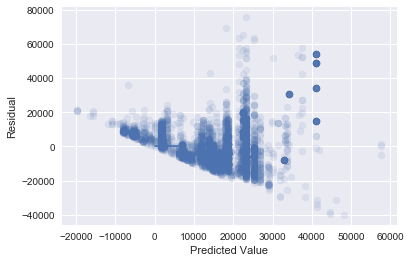

In [160]:
#Create a Residual Plot
y2_pred = results.predict(sm.add_constant(X2))

plt.scatter(y2_pred,y2-y2_pred,alpha=.1)
plt.plot(np.linspace(0,6000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

The residual plot above does not look good. The residuals are not evenly scattered. There is also a line of residuals on the left side.

<h1>3. Complete Linear Regression Model</h1>

After testing multiple features, I've selected the following features to be included in my model. I found that these features resulted in the highest R^2.

In [161]:
#Linear Regression
X3=df.loc[:,['MaxOcc', 'Rating', 'Reviews', 'PriceMin', 'Bdrs', 
            'Hanalei, Kauai  Hawaii', 'Honolulu, Oahu  Hawaii', 
            'Kahana, Maui  Hawaii', 'Kailua-Kona, Hawaii  Hawaii', 'Kaluakoi, Molokai  Hawaii', 
            'Kapaa, Kauai  Hawaii', 'Kapolei, Oahu  Hawaii', 'Kauai  Hawaii', 
            'Kaupalua, Maui  Hawaii', 'Kihei, Maui  Hawaii', 'Ko Olina, Oahu  Hawaii', 
            'Lahaina, Maui  Hawaii', 'Lihue, Kauai  Hawaii', 
            'Makaha, Oahu  Hawaii', 'Maui  Hawaii' 
            ]]


y3=df['Price']



model = sm.OLS(y3,sm.add_constant(X3))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 06 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:21:51   Log-Likelihood:                -47911.
No. Observations:                4443   AIC:                         9.586e+04
Df Residuals:                    4422   BIC:                         9.600e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -7.596e+04   5299.654    -14.334      0.000   -8.64e+04   -6.56e+04
MaxOcc                      -1132.2623    183.977     -6.154      0.000   -1492.950    -771.574
Rating                       9936.7105   1431.946      6.939      0.000    7129.380    1.27e+04
Reviews                        -1.8177      0.196     -9.256      0.000      -2.203      -1.433
PriceMin                       59.8856      5.797     10.331      0.000      48.521      71.250
Bdrs                         1.816e+04    596.377     30.455      0.000     1.7e+04    1.93e+04
Hanalei, Kauai  Hawaii       5307.8347   1913.764      2.774      0.006    1555.900    9059.769
Honolulu, Oahu  Hawaii       1.676e+04   1016.152     16.491      0.000    1.48e+04    1.87e+04
Kahana, Maui  Hawaii         1.159e+04   5327.854      2.176      0.030    1149.398     2.2e+04
Kailua-Kona, Hawaii  Hawaii  6401.9201   1238.369      5.170      0.000    3974.097    8829.743
Kaluakoi, Molokai  Hawaii    8165.5657   1.17e+04      0.697      0.486   -1.48e+04    3.11e+04
Kapaa, Kauai  Hawaii         1.071e+04   4820.627      2.223      0.026    1263.030    2.02e+04
Kapolei, Oahu  Hawaii        3078.6318    822.724      3.742      0.000    1465.681    4691.582
Kauai  Hawaii                2262.5040   1159.107      1.952      0.051      -9.926    4534.934
Kaupalua, Maui  Hawaii       1.983e+04   4265.677      4.648      0.000    1.15e+04    2.82e+04
Kihei, Maui  Hawaii          4608.3644   1889.101      2.439      0.015     904.781    8311.948
Ko Olina, Oahu  Hawaii       8997.1131   1.17e+04      0.766      0.444    -1.4e+04     3.2e+04
Lahaina, Maui  Hawaii        9227.0316    828.933     11.131      0.000    7601.907    1.09e+04
Lihue, Kauai  Hawaii         1.205e+04    953.767     12.634      0.000    1.02e+04    1.39e+04
Makaha, Oahu  Hawaii         5412.5197   4183.557      1.294      0.196   -2789.346    1.36e+04
Maui  Hawaii                 1.208e+04   1013.637     11.921      0.000    1.01e+04    1.41e+04
==============================================================================
Omnibus:                     1288.740   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5020.474
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                       7.402   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

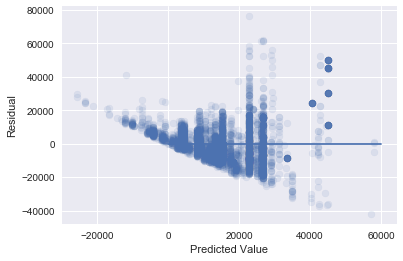

In [162]:
#Residual Plot for the 2nd model
y3_pred = results.predict(sm.add_constant(X3))

plt.scatter(y3_pred,y3-y3_pred,alpha=.1)
plt.plot(np.linspace(0,60000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

<h1>4. Validate Linear Regression Model</h1>

I will validate the y3 and X3 model using cross validation.

In [163]:
#Build holdout set

X_train, X_holdout, y_train, y_holdout = train_test_split(X3, y3, test_size=0.1, random_state=42)

In [164]:
#Split data into 5 folds

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [165]:
#Linear Regression on Training Data

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.39998749  0.40135306  0.46524953  0.45881865  0.46679109]
Linear Reg Mean Score:  0.438439965796


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

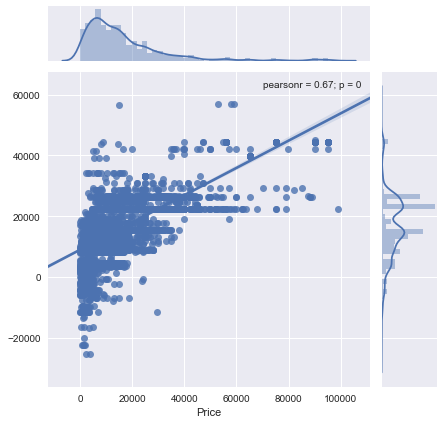

In [166]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

#plt.scatter(y_train, y_train_pred, alpha=0.2)
#plt.xlabel('Actual')
#plt.ylabel('Fitted')
#plt.plot()

sns.jointplot(y_train, y_train_pred, kind='regplot')

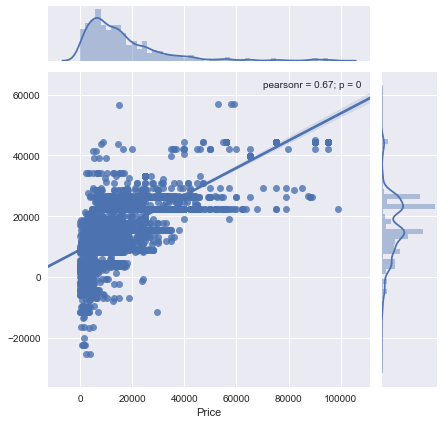

In [167]:
# Fitted vs. Actual (Holdout)
y_test_pred = lin_reg_est.predict(X_holdout)

sns.jointplot(y_train, y_train_pred, kind='regplot')

#regplot is a tool to visualize

<h1>5. Polynomial Regression (2 Degrees)</h1>



In [168]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

poly = PolynomialFeatures(degree=2)

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_holdout))
print("Polynomial Regression:", r2_score(y_holdout, y_pred))

Polynomial Regression: 0.675176617638


<h1>6. Cross Validate Polynomial Regression</h1>

In [169]:
#Use poly to raise X3 to the 2nd power
poly = PolynomialFeatures(degree=2)
X4 = poly.fit_transform(X3)
y4=df['Price']

In [170]:
#Build holdout set

X_train, X_holdout, y_train, y_holdout = train_test_split(X4, y4, test_size=0.1, random_state=42)

In [171]:
#Split data into 5 folds

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [172]:
#Linear Regression on Training Data

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.56067951  0.49896432  0.6312466   0.62948639  0.64784897]
Linear Reg Mean Score:  0.593645157283


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

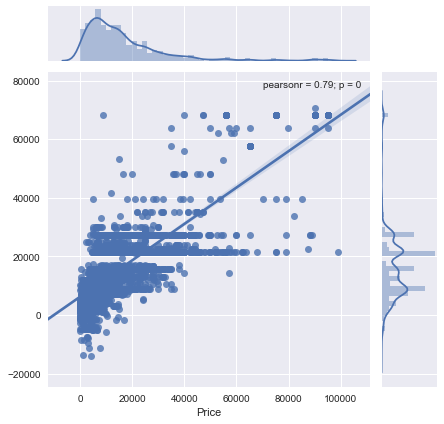

In [173]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

#plt.scatter(y_train, y_train_pred, alpha=0.2)
#plt.xlabel('Actual')
#plt.ylabel('Fitted')
#plt.plot()

sns.jointplot(y_train, y_train_pred, kind='regplot')

Text(0,0.5,'Residual')

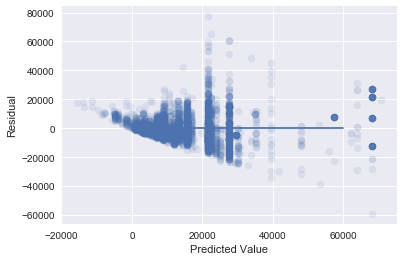

In [174]:
#Residual Plot for the Polynomial model
y_pred = lin_reg_est.predict(sm.add_constant(X4))

plt.scatter(y_pred,y4-y_pred,alpha=.1)
plt.plot(np.linspace(0,60000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

<h1>7. Polynomial Regression (Testing Multiple Degrees)</h1>

In [175]:
#Degree = 3

X_train, X_holdout, y_train, y_holdout = train_test_split(X3, y3, test_size=0.1, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

poly = PolynomialFeatures(degree=3)

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_holdout))
print("Polynomial Regression:", r2_score(y_holdout, y_pred))

Polynomial Regression: 0.430848710979


In [176]:
#Degree = 4

X_train, X_holdout, y_train, y_holdout = train_test_split(X3, y3, test_size=0.1, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

poly = PolynomialFeatures(degree=4)

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_holdout))
print("Polynomial Regression:", r2_score(y_holdout, y_pred))

Polynomial Regression: -85.0408229874


2 Degrees produced the best R^2.

<h1>8. Regularization: Lasso</h1>

In [250]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [252]:
#Need to transform variables again

X5=df.loc[:,['MaxOcc', 'Rating', 'Reviews', 'PriceMin', 'Bdrs', 
            'Hanalei, Kauai  Hawaii', 'Honolulu, Oahu  Hawaii', 
            'Kahana, Maui  Hawaii', 'Kailua-Kona, Hawaii  Hawaii', 'Kaluakoi, Molokai  Hawaii', 
            'Kapaa, Kauai  Hawaii', 'Kapolei, Oahu  Hawaii', 'Kauai  Hawaii', 
            'Kaupalua, Maui  Hawaii', 'Kihei, Maui  Hawaii', 'Ko Olina, Oahu  Hawaii', 
            'Lahaina, Maui  Hawaii', 'Lihue, Kauai  Hawaii', 
            'Makaha, Oahu  Hawaii', 'Maui  Hawaii' 
            ]]


y5=df['Price']

In [253]:
#Create a function to square predictor variables

def add_square_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [254]:
#Transform X5 and y5 to polynomials
poly = PolynomialFeatures(degree=2)
X6 = poly.fit_transform(X5)
y6=df['Price']

In [255]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X6, y6, test_size=0.1, random_state=42)

In [256]:
alphalist = 10**(np.linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    test_set_pred2 = pipe.predict(X_holdout)
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred2 - y_holdout)**2))

    train_set_pred2 = pipe.predict(X_train)
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred2 - y_train)**2))

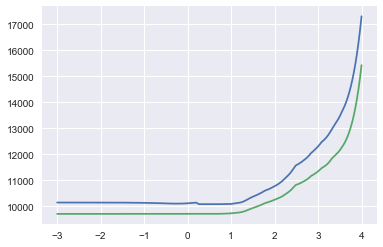

In [257]:
plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)


In [258]:
#This is the value of alpha that gave the lowest error
alphalist[np.argmin(err_vec_test)]


3.8720387818125532

In [226]:
lr_model = Lasso(alpha = 3.8720387818125532)
lr_model.fit(X_train,y_train)

Lasso(alpha=3.8720387818125532, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [215]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
lr_model = LassoCV(alphas = alphavec, cv=5)
lr_model.fit(X_tr,y_train)

LassoCV(alphas=array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03,   2.89427e+03,   8.37678e+03,
         2.42446e+04,   7.01704e+04,   2.03092e+05,   5.87802e+05,
         1.70125e+06,   4.92388e+06,   1.42510e+07,   4.12463e+07,
         1.19378e+08,   3.45511e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [216]:
#This is the best alpha value it found
lr_model.alpha_

4.9238826317067419

In [249]:
#These are the coefficients when it refit using that best alpha
list(zip(add_square_terms(X5).columns,lr_model.coef_))

[('MaxOcc', 0.0),
 ('Rating', -10056.227454281448),
 ('Reviews', -0.0),
 ('PriceMin', 5.5666410668669792),
 ('Bdrs', -192.65477527441178),
 ('Hanalei, Kauai  Hawaii', -42866.284826837044),
 ('Honolulu, Oahu  Hawaii', 0.0),
 ('Kahana, Maui  Hawaii', -0.0),
 ('Kailua-Kona, Hawaii  Hawaii', 0.0),
 ('Kaluakoi, Molokai  Hawaii', 0.0),
 ('Kapaa, Kauai  Hawaii', 0.0),
 ('Kapolei, Oahu  Hawaii', 0.0),
 ('Kauai  Hawaii', 0.0),
 ('Kaupalua, Maui  Hawaii', 0.0),
 ('Kihei, Maui  Hawaii', 0.0),
 ('Ko Olina, Oahu  Hawaii', 0.0),
 ('Lahaina, Maui  Hawaii', 0.0),
 ('Lihue, Kauai  Hawaii', 9550.0523643317047),
 ('Makaha, Oahu  Hawaii', -2508.6196901753165),
 ('Maui  Hawaii', -0.0),
 ('MaxOcc**2', -0.0),
 ('Rating**2', -287.18192956105702),
 ('Reviews**2', 2626.5492571145546),
 ('PriceMin**2', -0.51107880480467371),
 ('Bdrs**2', 1.1881778671736258),
 ('Hanalei, Kauai  Hawaii**2', 656.07589105968327),
 ('Honolulu, Oahu  Hawaii**2', 3040.7690653968866),
 ('Kahana, Maui  Hawaii**2', 379.32319899443723),
 (

In [264]:
#Create LARS Path
from sklearn.linear_model import lars_path

In [265]:
## Scale the variables
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [266]:

X_tr = std.transform(X_train)

In [267]:
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

.

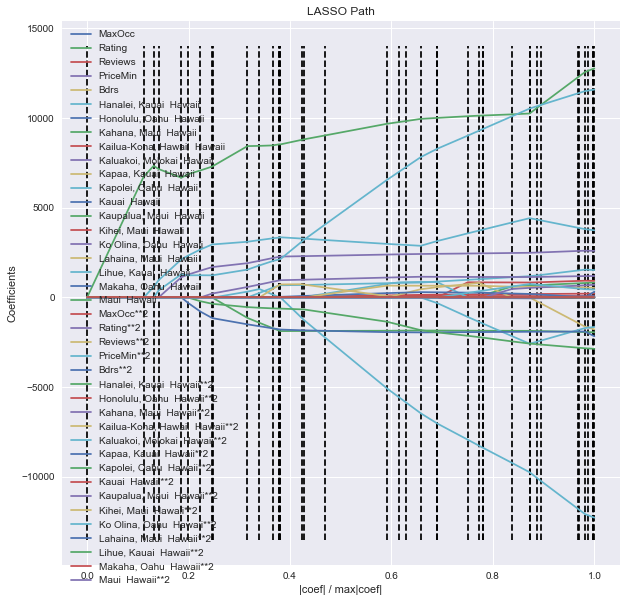

In [268]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(add_square_terms(X5))
plt.show()

I will try a new model using the selected features from LASSO.

In [270]:
lasso_col = df.loc[:,['Rating', 'Reviews', 'PriceMin', 'Bdrs', 
            'Hanalei, Kauai  Hawaii', 'Honolulu, Oahu  Hawaii', 
            'Kahana, Maui  Hawaii', 'Kaluakoi, Molokai  Hawaii', 
            'Kapolei, Oahu  Hawaii', 'Kauai  Hawaii', 
            'Kaupalua, Maui  Hawaii', 'Ko Olina, Oahu  Hawaii', 
            'Lihue, Kauai  Hawaii', 
            'Makaha, Oahu  Hawaii', 'Maui  Hawaii' 
            ]]

In [272]:
X_train, X_holdout, y_train, y_holdout = train_test_split(add_square_terms(lasso_col), y6, test_size=0.1, random_state=42)

poly = PolynomialFeatures(degree=2)

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_holdout))
print("Polynomial Regression:", r2_score(y_holdout, y_pred))

Polynomial Regression: 0.699464976209


In [273]:
#Cross validation

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.44632254  0.45122591  0.54575686  0.47747908  0.54120078]
Linear Reg Mean Score:  0.492397032624


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The score is lower after using LASSO. The model that will be kept is the 2nd Degree Polynomial Regression model.